In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)
warnings.filterwarnings(action = 'ignore', category=UserWarning)

In [13]:
## 读取数据
path1 = "datas/winequality-red.csv"
df1 = pd.read_csv(path1, sep=";")
df1['type'] = 1 # 设置数据类型为红葡萄酒

path2 = "datas/winequality-white.csv"
df2 = pd.read_csv(path2, sep=";")
df2['type'] = 0 # 设置数据类型为白葡萄酒

# 合并两个df
df = pd.concat([df1,df2], axis=0)
#print df2.info
## 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]

## 因变量名称
quality = "quality"

In [14]:
## 异常数据处理
new_df = df.replace('?', np.nan)
datas = new_df.dropna(axis=0, how = 'any') # 只要有行为空，就进行删除操作

X = datas[names]
Y = datas[quality]
Y.ravel()

array([5, 5, 5, ..., 6, 7, 6])

In [15]:
## 创建模型列表
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression())
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', RidgeCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LassoCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', ElasticNetCV(alphas=np.logspace(-4,2, 20), l1_ratio=np.linspace(0, 1, 5)))
        ])
]

(u'linear regretion:1\u9636, \u622a\u8ddd:103, \u7cfb\u6570:', array([ 0.00000000e+00,  8.50118207e-02, -1.48620723e+00, -6.90416760e-02,
        6.23516751e-02, -7.18643184e-01,  4.99059722e-03, -1.45047299e-03,
       -1.03460590e+02,  4.97432666e-01,  7.21153860e-01,  2.23033948e-01,
        3.51639435e-01]))
(u'linear regretion:2\u9636, \u622a\u8ddd:-709, \u7cfb\u6570:', array([ 1.46176940e-05, -2.74516395e+01,  9.87661446e+01,  2.49676785e+02,
       -1.74998937e+01, -1.15483093e+03, -2.43456904e+00,  9.13621910e-01,
        1.19491595e+03,  1.26064733e+02,  5.80781882e+01,  1.98966671e+01,
       -7.77787859e+01, -4.34318334e-02,  3.31320951e-02,  4.24739822e-01,
       -2.31878257e-02, -2.40247894e+00, -7.35719422e-05,  3.64009508e-04,
        2.78865437e+01,  9.27783428e-02,  2.07233708e-01,  1.34480742e-02,
       -5.45491074e-02,  4.37670831e-01,  8.75879632e-01, -3.84236402e-02,
        1.10461091e+00,  5.84956240e-03,  7.21047496e-03, -1.09383487e+02,
        9.44208782e-01

(u'Ridge regreation:2\u9636, \u622a\u8ddd:9, \u7cfb\u6570:', array([ 0.00000000e+00, -4.01950760e+00, -4.60089764e+00, -1.92188313e+00,
       -1.23399160e+01,  5.95116113e+00, -2.26177275e+00,  1.87000389e+00,
       -5.73074099e-01,  8.09952056e-01, -1.51824556e+00,  6.36779636e+00,
        7.85743219e-01, -2.49781684e-02, -3.19304373e-02,  1.54611802e-01,
       -9.10469674e-03, -6.93297154e-01, -2.82831978e-04,  1.24966099e-03,
        4.29495946e+00,  4.65804455e-02,  1.43284864e-01, -1.23798662e-02,
        1.20930947e-01,  2.33387837e-01,  7.72556808e-01, -6.10987046e-02,
        1.14028323e+00,  5.30296108e-03,  8.40966233e-03, -4.15791092e+00,
        3.33768806e-01, -5.23991271e-02,  4.61164353e-01,  1.34510706e+00,
       -9.92879504e-01, -2.75135390e-02,  5.56754741e+00,  1.04088248e-02,
       -1.57266614e-03, -1.96957349e+00,  2.61311550e-01, -7.70780075e-01,
        2.63864261e-01, -1.07712273e+00, -7.08985891e-03, -2.27389490e-01,
       -1.28126637e-03,  8.40138644e-04

(u'Lasso regration:2\u9636, \u622a\u8ddd:9, \u7cfb\u6570:', array([ 0.00000000e+00, -8.36148167e-03, -5.66620821e-01, -0.00000000e+00,
        1.13912448e-01,  0.00000000e+00, -4.19775574e-02,  4.86804701e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.14456124e-01,
        4.70298805e-02, -1.88787712e-02, -2.03293677e-01, -0.00000000e+00,
        6.47920970e-03, -2.54053503e-02,  1.05821763e-03, -5.75194191e-05,
        2.07741528e-01,  6.02832690e-02,  8.19681154e-02, -1.82682969e-02,
        1.75330991e-01,  5.93929884e-02,  3.71096449e-01, -1.40209721e-02,
        0.00000000e+00,  6.43521575e-04,  5.49611234e-03, -1.45682284e+00,
       -8.59552544e-01, -0.00000000e+00,  3.48071984e-01,  1.63676185e+00,
       -8.54941498e-01, -2.95331388e-02,  0.00000000e+00,  5.08642517e-03,
       -7.63032643e-04, -0.00000000e+00, -2.67424425e-01, -7.08015112e-01,
        1.82655768e-01, -3.95411406e-01, -3.65930085e-04, -1.44157414e-01,
       -8.54311835e-04,  2.46834100e-04,

(u'ElasticNet:1\u9636, \u622a\u8ddd:2, \u7cfb\u6570:', array([ 0.00000000e+00, -3.90561217e-04, -1.54502094e+00, -1.02627764e-01,
        2.32270541e-02, -8.53392514e-01,  5.66252559e-03, -1.81072304e-03,
       -4.19137576e-01,  1.00980373e-01,  5.78686888e-01,  3.35621847e-01,
        1.26777255e-01]))
(u'ElasticNet:2\u9636, \u622a\u8ddd:9, \u7cfb\u6570:', array([ 0.00000000e+00,  1.57665330e-02, -6.54944634e-01, -1.87731714e-01,
        1.07822795e-01,  4.65612851e-01, -4.39977849e-02,  5.00478275e-03,
       -2.56088946e-01,  2.31885537e-01,  1.53761832e-01, -3.20963819e-01,
        2.40149684e-01, -2.00601346e-02, -2.13485618e-01,  2.20751566e-02,
        6.33808540e-03, -1.31166055e-01,  1.11435179e-03, -9.22063796e-05,
        2.43434351e-01,  4.94936148e-02,  9.24671811e-02, -1.91498173e-02,
        1.83590979e-01,  2.88870272e-01,  7.15114349e-01, -1.62813925e-02,
        1.29668322e-01,  2.29732222e-03,  4.68202145e-03, -8.94521255e-01,
       -1.05057435e+00, -5.61397229e-02

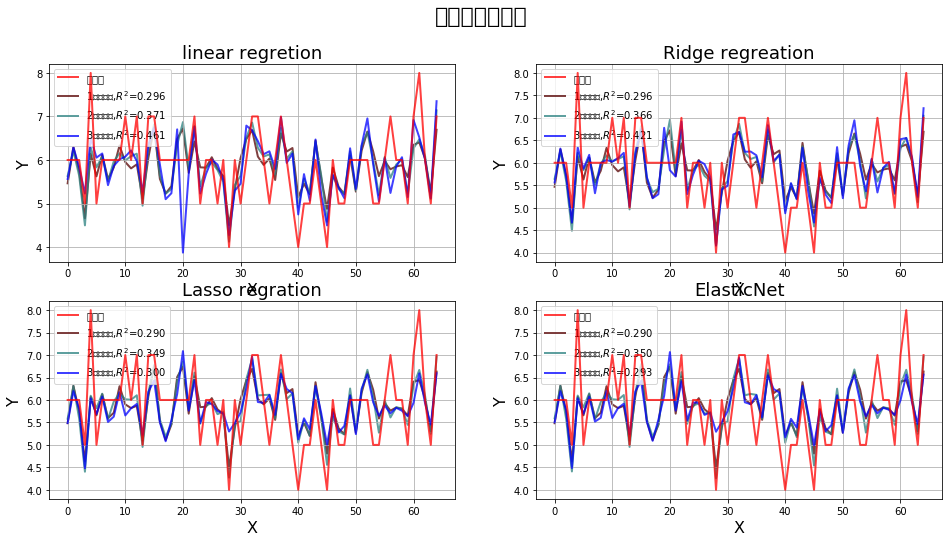

In [17]:
plt.figure(figsize=(16,8), facecolor='w')
titles = 'linear regretion', 'Ridge regreation', 'Lasso regration', 'ElasticNet'

## 将数据分为训练数据和测试数据
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
ln_x_test = range(len(X_test))

## 给定阶以及颜色
d_pool = np.arange(1,4,1) # 1 2 3 阶
m = len(d_pool)
clrs = [] # 颜色
for c in np.linspace(5570560, 255, m):
    clrs.append('#%06x' % int(c))


for t in range(4):
    plt.subplot(2, 2, t + 1)
    model = models[t]
    plt.plot(ln_x_test, Y_test, c='r', lw=2, alpha=0.75, zorder=10, label=u'真实值')
    for i,d in enumerate(d_pool):
        # 设置参数
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(X_train, Y_train)
        # 模型预测及计算R^2
        Y_pre = model.predict(X_test)
        ## NOTE: 将Y_pre这种连续性的预测值，转换为离散形式的（转换方式：四舍五入）
        ## NOTE: 既然变成分类的应用的话，那么模型评估指标就不能用R^2，
        ## NOTE: 这里用准确率(两种方式实现，一：numpy原始的实现，二：基于sklearn的相关API实现)
        R = model.score(X_train, Y_train)
        # 输出信息
        lin = model.get_params()['Linear']
        output = u"%s:%d阶, 截距:%d, 系数:" % (titles[t], d, lin.intercept_)
        print(output, lin.coef_)
        ## 图形展示
        plt.plot(ln_x_test, Y_pre, c=clrs[i], lw=2,alpha=0.75, zorder=i, label=u'%d阶预测值,$R^2$=%.3f' % (d,R))
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.title(titles[t], fontsize=18)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.suptitle(u'葡萄酒质量预测', fontsize=22)
plt.show()

In [ ]:
plt.